# SMS SPAM DETECTION

#Download the dataset from given link:
https://drive.google.com/file/d/1qpPwOdKChwMCDbL8j6JO2KzHCWcWftRF/view

Data Set Information:

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.



# Import the required libraries

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data 

In [4]:
sms_spam=pd.read_csv("data/SMSSpamCollection",sep="\t",names=['sms','message'])

In [5]:
sms_spam.head()

,sms,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
sms_spam.tail()

,sms,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [73]:
sms_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sms      5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Exploratory Data Analysis

In [75]:
a=sms_spam.shape
print("There Are {} Rows and {} Columns".format(a[0],a[1]))

There Are 5572 Rows and 2 Columns


In [74]:
sms.isnull().values.any()

False

In [76]:
sms_spam.describe

<bound method NDFrame.describe of        sms                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [77]:
sms.columns

Index(['sms', 'message'], dtype='object')

In [80]:
sms['sms'].value_counts()

ham     4825
spam     747
Name: sms, dtype: int64

In [78]:
sms['message'].value_counts()

Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
Okie                                                                                                                                                                                    4
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.     4
                                                                      

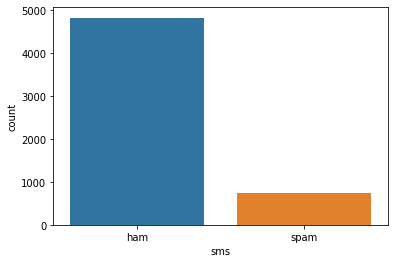

In [79]:
sns.countplot(x='sms', data=sms)

# word cloud for smsspam

In [14]:
!pip install wordcloud

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
df = sms_spam.loc[sms_spam['sms']=='spam', :]


In [8]:
df.head()

,sms,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [84]:
df['sms'].value_counts()

spam    747
Name: sms, dtype: int64

In [8]:
df=sms_spam[sms_spam['sms']=='negative']
words = ' '.join(sms_spam['message'])
print(words)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitl

In [9]:
cleaned_word = " ".join([word for word in words.split()])

In [10]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='green',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

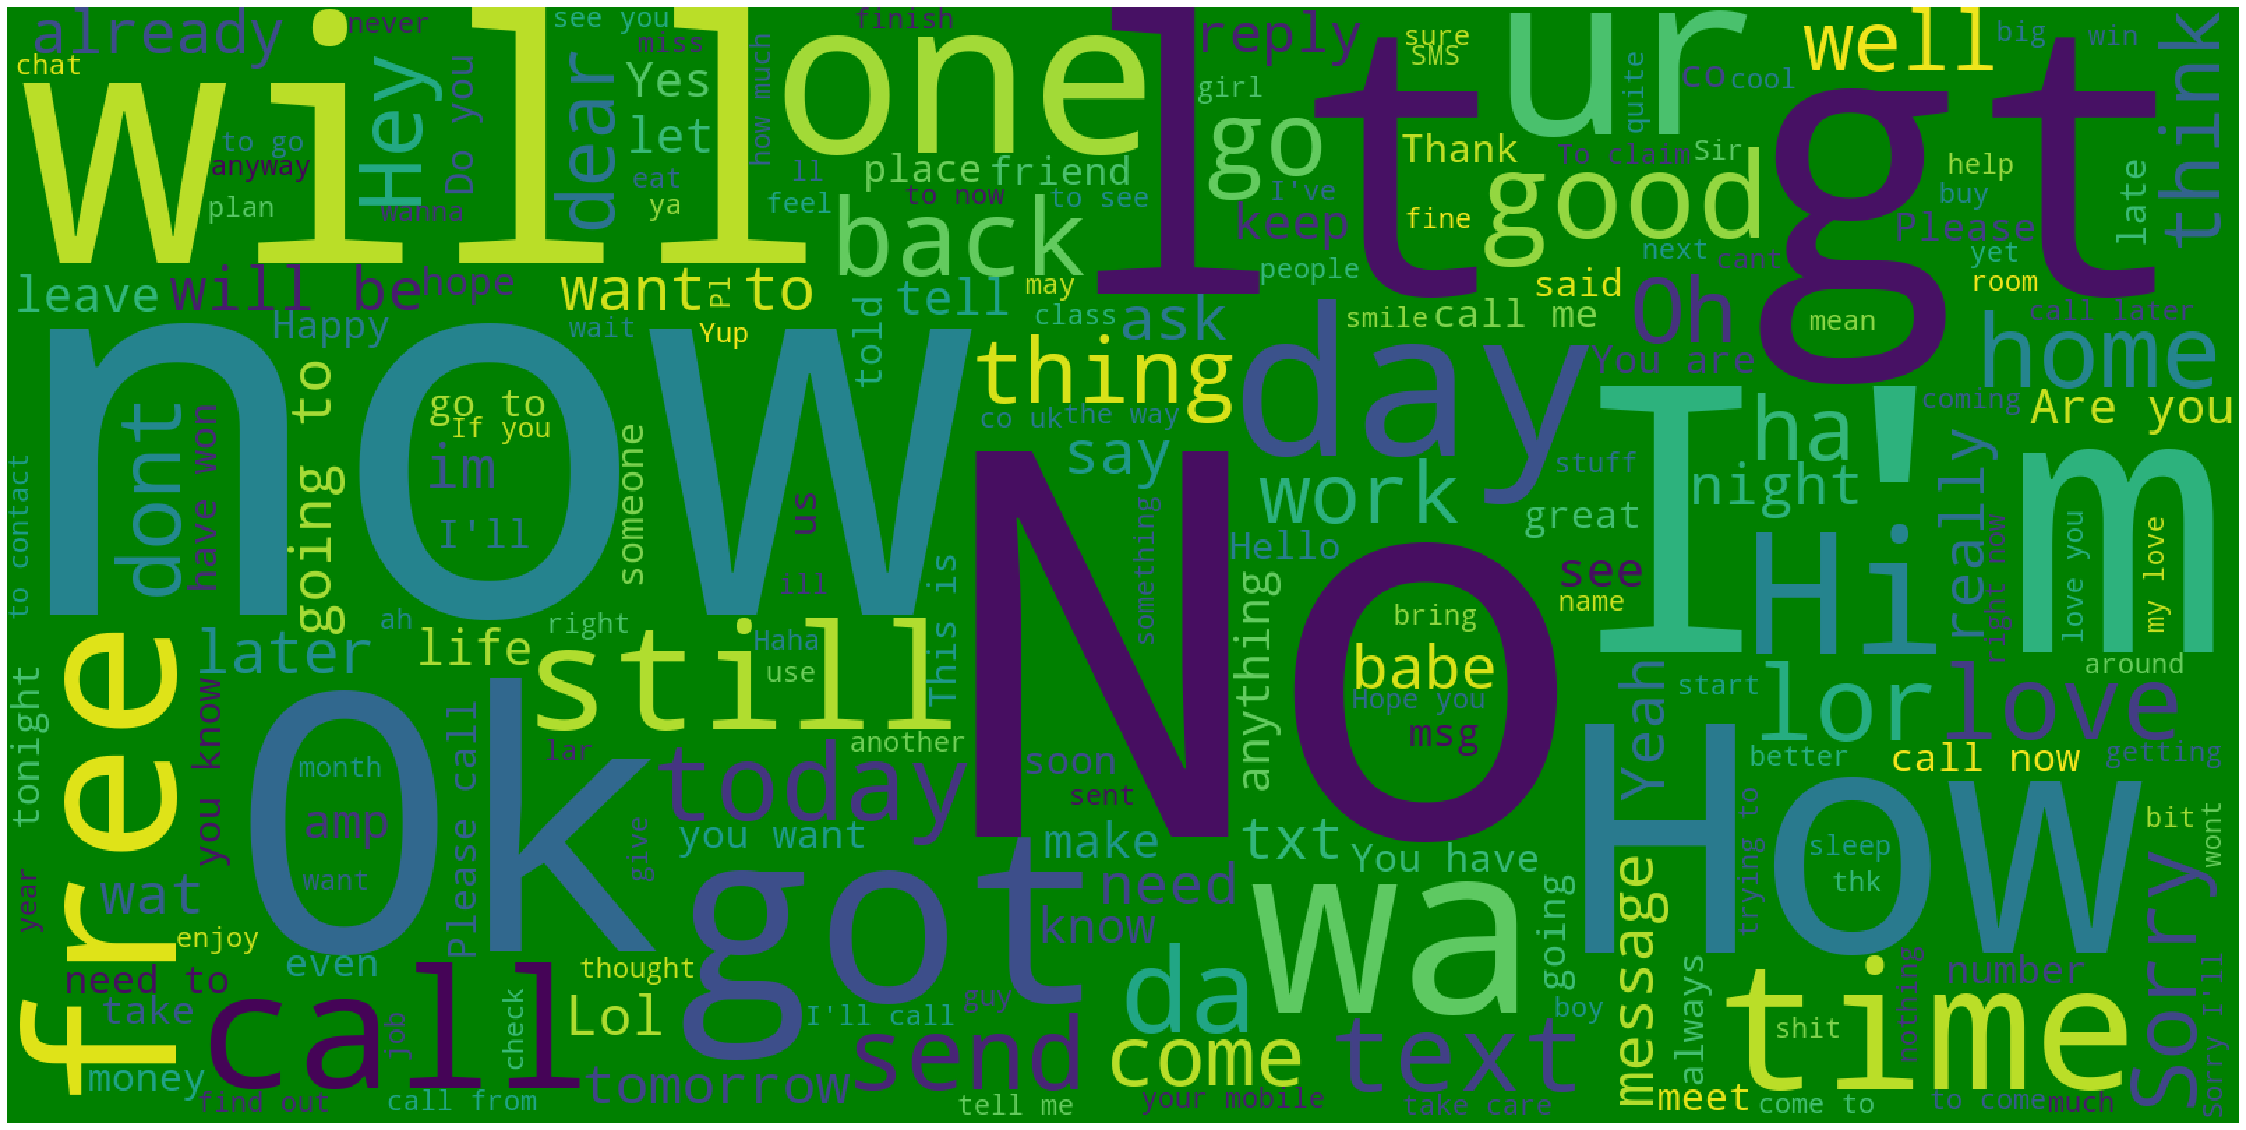

In [11]:
plt.figure(1,figsize=(40,30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Preprocessing

Preprocessing Steps

1.)convert sentence into lower case
2.)Remove stop words
3.)stemming

In [16]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import porterStemmer
from nltk.stem import WordNetLemmatizer

ImportError: cannot import name 'porterStemmer' from 'nltk.stem.porter' (C:\Users\HP\anaconda3\lib\site-packages\nltk\stem\porter.py)

In [106]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [ ]:

# We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [ ]:
# initializing the lists
clean_tweet_lst = []
tweet_len_lst = []

In [ ]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    tweet_len_lst.append(len(words))

In [ ]:
sms_spam['sms_spam']=sms_spam['sms'].apply(lambda x: 0 if x=='spam' else 1)

In [ ]:
clean_tweet_lst = []
tweet_len_lst = []

sms_spam['sms'].apply(lambda x: preprocess(x, 'stem'))

sms_spam['clean_tweet_stem'] = clean_tweet_lst

sms_spam['tweet_length_stem'] = tweet_len_lst

In [ ]:
clean_tweet_lst = []
tweet_len_lst = []

tweet_df['message'].apply(lambda x: preprocess(x, 'stem'))

tweet_df['clean_tweet_stem'] = clean_tweet_lst

tweet_df['tweet_length_stem'] = tweet_len_lst


# Data Preparation

In [62]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
train, test = train_test_split(sms,test_size=0.2,random_state=42)


In [63]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

KeyError: 'clean_tweet_stem'

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")
train_features = vectorizer.fit_transform(train_clean_tweet)
test_features = vectorizer.transform(test_clean_tweet)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [65]:
vectorizer.vocabulary_

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

In [ ]:

print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
classifier = LogisticRegression()

In [ ]:

dense_features = train_features.toarray()
dense_test = test_features.toarray()

fit = classifier.fit(dense_features,train['sms_spam'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['sms_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

In [ ]:
from sklearn import metrics
con_metric = metrics.confusion_matrix(pred,test['sms_spam'])
con_metric

In [ ]:
# heatmap
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['sms_spam']))

# Decision Tree

In [ ]:
classifier_dt = DecisionTreeClassifier(max_depth = 2)

In [ ]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

fit = classifier_dt.fit(dense_features,train['sms_spam'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['sms_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

In [ ]:
from sklearn import metrics
con_metric = metrics.confusion_matrix(pred,test['sms_spam'])
con_metric

In [ ]:

# heatmap
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['sms_spam']))

# Svm

In [17]:
classifier_svc = SVC()

NameError: name 'SVC' is not defined

In [18]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()

fit = classifier_svc.fit(dense_features,train['sms_spam'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['sms_spam'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

NameError: name 'train_features' is not defined

In [ ]:
from sklearn import metrics
con_metric = metrics.confusion_matrix(pred,test['sms_spam'])
con_metric

In [ ]:

# heatmap
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(pred,test['sms_spam']))